# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [5]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [6]:
# run this cell to upload file using GUI if you are using google colab

#from google.colab import files
#files.upload()

In [7]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import os

df = pd.read_csv('/content/drive/MyDrive/prices.csv')

In [9]:
os.getcwd()

'/content'

In [10]:
df.shape

(851264, 7)

In [11]:
df.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [12]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

No null vallues found.

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [13]:
df.drop(['date','volume','symbol'],axis=1, inplace=True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [14]:
df.head(5)

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [15]:
x = df.drop('close', axis=1)
y = df['close']

In [16]:
x.head(5)

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [17]:
y.head(5)

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [20]:
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [21]:
type(scaled_X_train)

numpy.ndarray

In [22]:
type(y_train)

pandas.core.series.Series

In [23]:
y_train_1 = np.array(y_train)
y_test_1 = np.array(y_test)

In [24]:
print(type(y_train_1))
print(type(y_test_1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [26]:
model = Sequential([Flatten(), Dense(1, activation='linear')])

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [27]:
model.compile(optimizer='sgd', loss='mse')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [28]:
model.fit(scaled_X_train,y_train_1, validation_data=(scaled_X_test,y_test_1),epochs=50,batch_size=128)

Epoch 1/50
4656/4656 [==============================] - 5s 1ms/step - loss: 251.1656 - val_loss: 0.9630
Epoch 2/50
4656/4656 [==============================] - 5s 993us/step - loss: 0.9347 - val_loss: 0.9490
Epoch 3/50
4656/4656 [==============================] - 5s 999us/step - loss: 0.9636 - val_loss: 0.9658
Epoch 4/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9577 - val_loss: 0.9660
Epoch 5/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9310 - val_loss: 0.9290
Epoch 6/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9247 - val_loss: 0.9499
Epoch 7/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9178 - val_loss: 0.9174
Epoch 8/50
4656/4656 [==============================] - 5s 980us/step - loss: 0.9298 - val_loss: 0.9118
Epoch 9/50
4656/4656 [==============================] - 5s 996us/step - loss: 0.9025 - val_loss: 0.9229
Epoch 10/50
4656/4656 [==============================] - 5s 995us/step -

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [29]:
model.evaluate(scaled_X_test,y_test_1)

7981/7981 [==============================] - 5s 668us/step - loss: 0.7094


0.7094445824623108

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [30]:
model.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[119.8209]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [31]:
import tensorflow as tf
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Change train and test labels into one-hot vectors

In [33]:
train_y= tf.keras.utils.to_categorical(y_train, num_classes=10)
test_y = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [34]:
train_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
train_y.shape

(60000, 10)

### Build the Graph

### Initialize model, reshape & normalize data

In [36]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model_1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_1.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [37]:
model_1.add(tf.keras.layers.Dense(200, activation='relu'))
model_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_1.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [38]:
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

In [40]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Print model summary

In [41]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

###Train your model, use test data as validation set

In [42]:
history = model_1.fit(x_train,train_y, validation_data=(x_test,test_y),epochs=20,batch_size=32, callbacks=callback)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6249 - accuracy: 0.7795 - val_loss: 0.3963 - val_accuracy: 0.8559
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4021 - accuracy: 0.8546 - val_loss: 0.3810 - val_accuracy: 0.8568
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3658 - accuracy: 0.8636 - val_loss: 0.3673 - val_accuracy: 0.8675
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3362 - accuracy: 0.8770 - val_loss: 0.3550 - val_accuracy: 0.8735
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3161 - accuracy: 0.8837 - val_loss: 0.3767 - val_accuracy: 0.8748
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8865 - val_loss: 0.3547 - val_accuracy: 0.8806
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.8922 - val_loss: 0.3571 - val_accuracy:

###Predict Labels

In [43]:
y_pred = np.argmax(model_1.predict(x_test),axis=1)

In [44]:
len(y_pred)

10000

###Print Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[858,   2,  21,  18,   4,   4,  86,   0,   7,   0],
       [  0, 979,   1,  14,   1,   0,   4,   0,   1,   0],
       [ 16,   0, 835,  10,  83,   0,  54,   0,   2,   0],
       [ 23,   4,  12, 903,  26,   1,  25,   0,   6,   0],
       [  1,   0,  88,  36, 829,   0,  42,   0,   4,   0],
       [  0,   0,   0,   0,   0, 958,   0,  25,   0,  17],
       [136,   3,  98,  26,  84,   1, 640,   0,  12,   0],
       [  0,   0,   0,   0,   0,  12,   0, 955,   1,  32],
       [  3,   0,   3,   4,   5,   4,   9,   3, 969,   0],
       [  1,   0,   0,   0,   0,  10,   1,  33,   0, 955]])

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

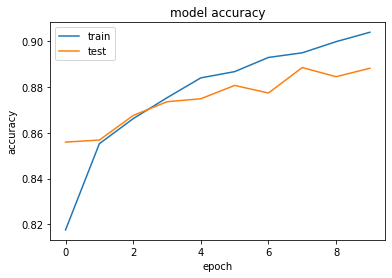

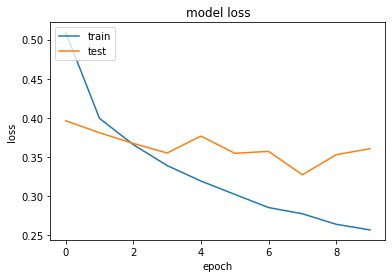

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
